# Simulazione 2023

## Teoria

1. Descrivere il funzionamento della trasformata distanza.

La trasformata distanza applica ad ogni valore dei pixel di Foreground, F, la distanza che hanno rispetto al Background, F*. La trasformata distanza si basa molto sul tipo di metrica che viene utilizzata. Nel caso in cui venisse impiegat la distanza D4, il calcolo della trasformata distanza è eseguita attraverso due semplici scansioni:
1. Scansione diretta, dall'alto verso il basso, da sinistra verso destra, il valore di P viene preso come min(p_nord, p_ovest) +1
2. Scansione inversa, dal basso verso l'alto, da destra verso sinitra, il valore di P viene preso come min(p_sud + 1, p_est + 1, p)


La trasformata distanza ci permette di ottenere lo scheletro di ogni componente che appartiene al Foreground.

2. Che cosa sono i parametri estrinseci del “pinhole camera model”?

I parametri estrinseci di una camera sono dei parametri che non dipendono dalla tipologia di camera che viene utilizzata ma ben si varia per ogni fotografica che viene eseguita. I parametri estrinseci sono divisi in due macro categorie:
1. La matrice di rotazione R, la quale è composta da 3 angoli principali, gli angoli di Eulero. Ogni angolo fa riferimento ad un asse, asse X, Y e Z. 
2. Il vettore di traslazione T, il quale contiene al suo interno i tre scalari con la quale traslare le varie coordinate X,Y e Z.


3. Cosa si intende generalmente per “sharpening” nell’elaborazione delle immagini?

L'operazione di sharpening permette di migliorare la messa a fuoco di una immagine. L'operazione di sharpening si ottiene mediante la convoluzione dell'immagine I con un filtro Fb normalizzato, successivamente il risultato di tale operazione verrà sotratta dall'immagine originale, M = I - (I * Fb). Una volta che si è memorizzati il valore di tale operazione nella variabile M, svolgiamo gli ultimi due passi per il calcolo di questa operazione. Possiamo moltiplicare la matrice M per un valore K che ne regola l'intensità dell'effetto ed infine verrà sommato all'immagine originale.

M = I - (I * Fb)
FinalImg = I + K*M

## Pratica

1. Convertire img in grayscale, memorizzando il risultato in un’immagine chiamata img_g

2. Se la larghezza di img_g è maggiore della sua altezza, ruotarla di 90 gradi in senso
antiorario (equivale a scambiare le righe con le colonne)

3. Binarizzare l'immagine utilizzando l'algoritmo di Otsu

4. Applicare al risultato del passo precedente un'operazione morfologica di dilatazione con un
elemento strutturante di forma quadrata e lato di 9 pixel

5. Trovare il più esteso gruppo di pixel di foreground contigui nell'immagine ottenuta al passo
precedente: eliminare tutti gli altri pixel di foreground

6. Restituire una copia di img_g in cui è dimezzata la luminosità dei pixel le cui posizioni sono
state individuate al passo precedente

In [1]:
import numpy as np
import cv2 as cv
import va

In [16]:
def esercizio(img):
    # Parte 1
    img_g = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Parte 2
    h, w = img_g.shape
    if w > h:
        img_g = img_g.T
    # Parte 3
    _, img_bin = cv.threshold(img_g, -1, 255, cv.THRESH_OTSU)
    # Parte 4
    img2 = cv.morphologyEx(img_bin, cv.MORPH_DILATE, cv.getStructuringElement(cv.MORPH_RECT, (9,9)))
    # Parte 5
    n, cc, stats, _ = cv.connectedComponentsWithStats(img2)
    arg_max = np.argmax(stats[1:, cv.CC_STAT_AREA]) + 1
    img3 = np.where(np.isin(cc,arg_max), 255, 0)
    # Parte 6
    img_g[img3 > 0] //=2
    return img_g.copy()
    

""
""

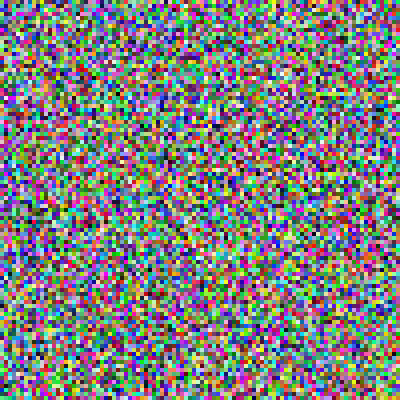

In [44]:
img = np.random.randint(0, 255, (100, 100, 3), dtype=np.uint8)
va.show(img)

""
""

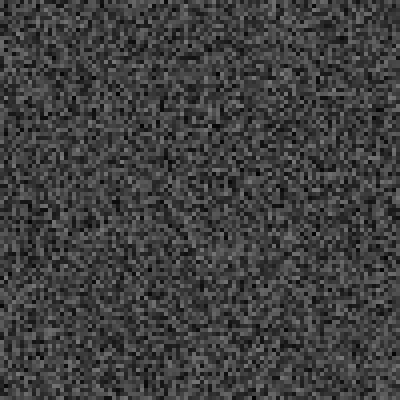

In [45]:
va.show(esercizio(img))